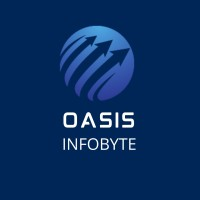

### **Name :** <font color = #5a5a5a>Harshal Prakash Margaj<font/>
### **Task 1 :** <font color = #5a5a5a>Iris Flower Classification<font/>
### **Description :** <font color = #5a5a5a> Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them. Although the Scikit-learn library provides a dataset for iris flower classification, you can also download the same [dataset](https://www.kaggle.com/datasets/saurabh00007/iriscsv) from here for the task of iris flower classification with Machine Learning <font/>


# **Importing Modules**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns           

# **Loading the data**

In [6]:
df = pd.read_csv("/content/Iris.csv")
df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### **<font color = #5a5a5a>Statistics data information<font/>**

In [7]:
# Generate descriptive statistics
df.describe() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### **<font color = #5a5a5a>Basic information about datatype<font/>**

In [8]:
# prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
# Return a Class labels containing counts of unique values.
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# **Preprocessing the dataset**

### **<font color = #5a5a5a>Checking for null values<font/>**

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [34]:
df.drop('Id', axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Exploratory Data Analysis of dataset**

### **<font color = #5a5a5a>Pairplot<font/>**

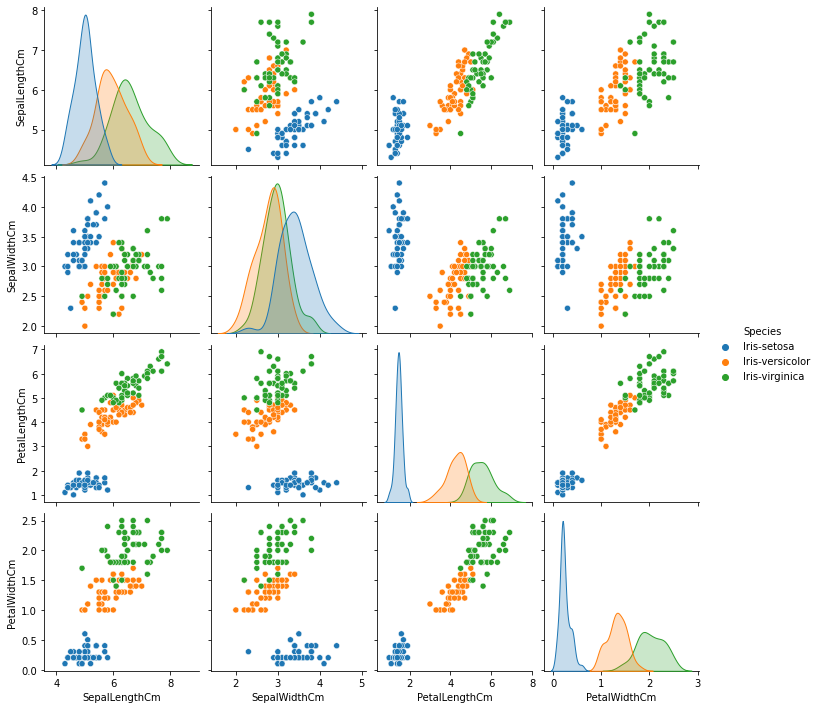

In [35]:
sns.pairplot(df, hue='Species')

### **<font color = #5a5a5a>Histograms<font/>**

#### **<font color=#0E86D4>Histogram of Sepal length</font>**

<Axes: >

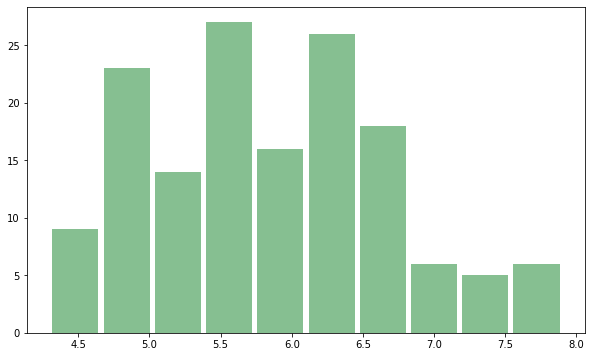

In [36]:
df['SepalLengthCm'].hist(grid=False, figsize=(10,6), color='#86bf91', rwidth=0.9)

#### **<font color=#0E86D4>Histogram of Sepal width</font>**

<Axes: >

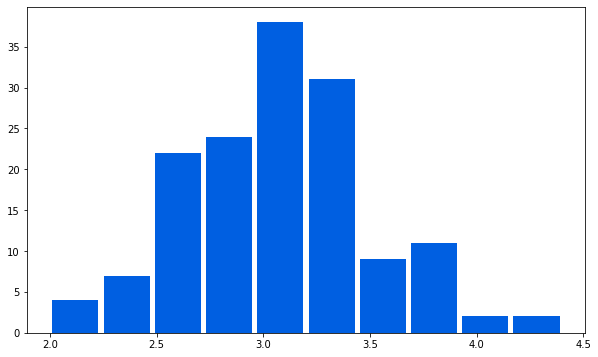

In [37]:
df['SepalWidthCm'].hist(grid=False, figsize=(10,6), color = '#005FE1', rwidth=0.9)

#### **<font color=#0E86D4>Histogram of Petal length</font>**

<Axes: >

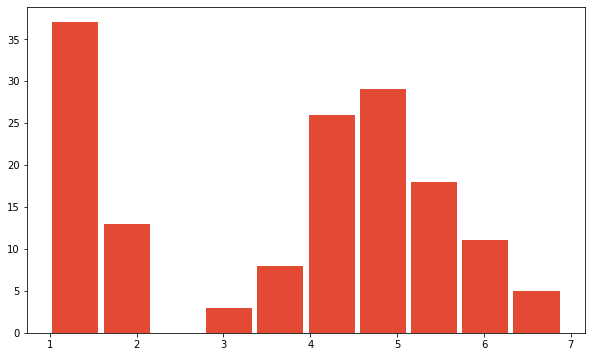

In [38]:
df['PetalLengthCm'].hist(grid=False, figsize=(10,6), color = "#e24a33", rwidth=0.9)

#### **<font color=#0E86D4>Histogram of Petal width</font>**

<Axes: >

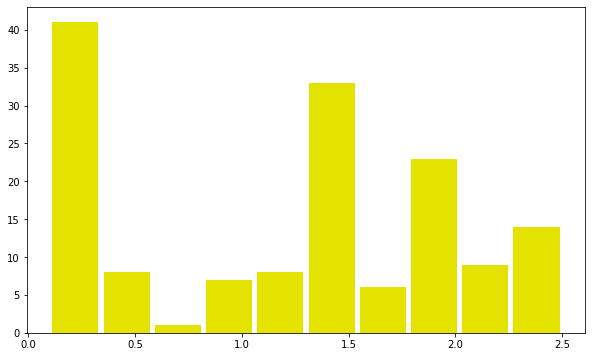

In [39]:
df['PetalWidthCm'].hist(grid=False, figsize=(10,6), color = '#E4E300', rwidth=0.9)

### **<font color = #5a5a5a>Scatterplot<font/>**

In [40]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

#### **<font color=#0E86D4>Scatterplot of Species with Sepal length and Sepal width</font>**

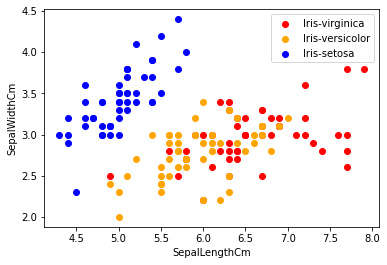

In [41]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

#### **<font color=#0E86D4>Scatterplot of Species with Petal length and Petal width</font>**

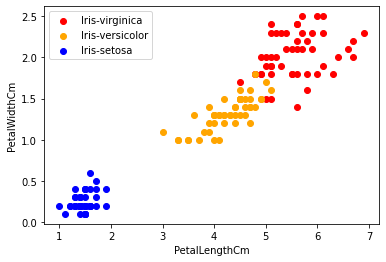

In [42]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

#### **<font color=#0E86D4>Scatterplot of Species with Sepal length and Petal length</font>**

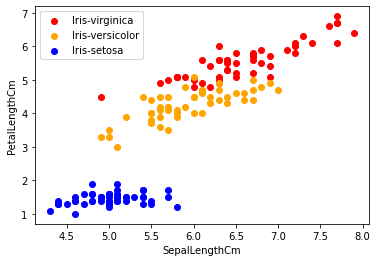

In [43]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()

#### **<font color=#0E86D4>Scatterplot of Species with Sepal width and Petal width</font>**

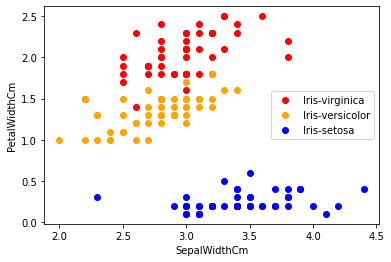

In [44]:
for i in range(3):
  x = df[df['Species'] == species[i]]
  plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])
plt.xlabel('SepalWidthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

### **<font color = #5a5a5a>Boxplots<font/>**


#### **<font color=#0E86D4>Boxplot of Sepal length</font>**

<Axes: ylabel='SepalLengthCm'>

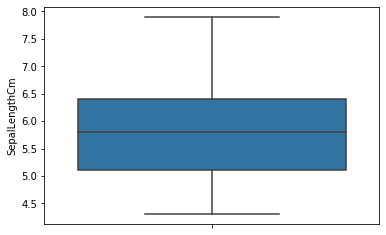

In [45]:
sns.boxplot(y = 'SepalLengthCm', data = df)


#### **<font color=#0E86D4>Boxplot of Sepal width</font>**

<Axes: ylabel='SepalWidthCm'>

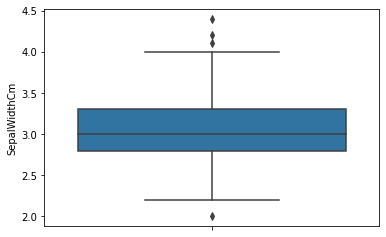

In [46]:
sns.boxplot(y = 'SepalWidthCm', data = df)


#### **<font color=#0E86D4>Boxplot of Petal length</font>**

<Axes: ylabel='PetalLengthCm'>

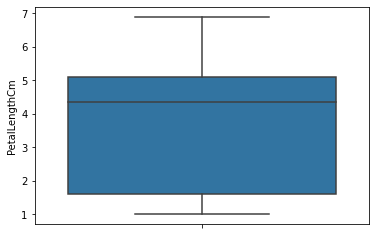

In [47]:
sns.boxplot(y = 'PetalLengthCm', data = df)


#### **<font color=#0E86D4>Boxplot of Petal width</font>**

<Axes: ylabel='PetalWidthCm'>

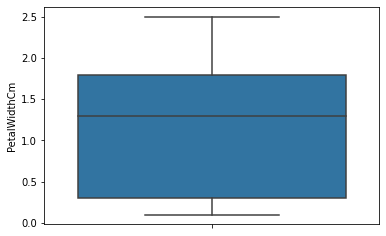

In [48]:
sns.boxplot(y = 'PetalWidthCm', data = df)


#### **<font color=#0E86D4>Boxplot of Species with Sepal length</font>**

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

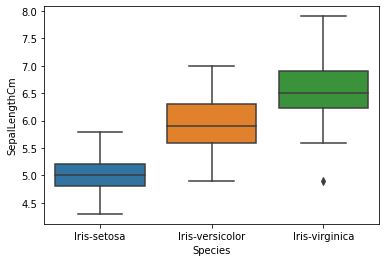

In [49]:
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = df)


#### **<font color=#0E86D4>Boxplot of Species with Sepal width</font>**

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

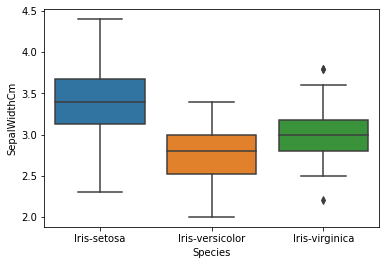

In [50]:
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = df)


#### **<font color=#0E86D4>Boxplot of Species with Petal length</font>**

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

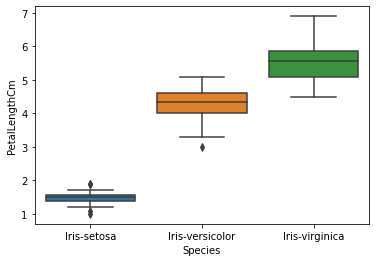

In [51]:
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df)

#### **<font color=#0E86D4>Boxplot of Species with Petal width</font>**

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

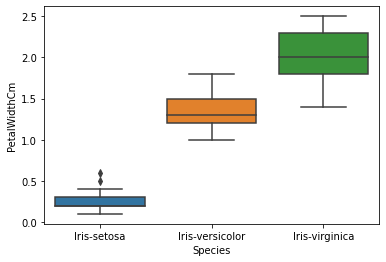

In [52]:
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = df)

# **Correlation Matrix**

In [53]:
# Compute pairwise correlation of columns, excluding NA/null values.
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

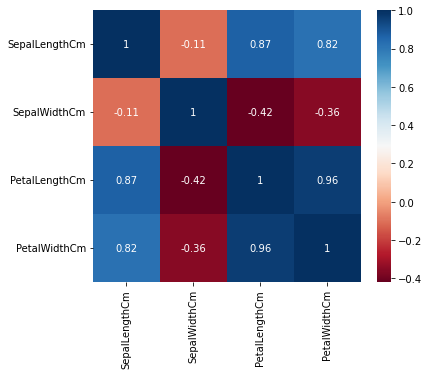

In [62]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (6,5))
sns.heatmap(corr, annot = True,  ax = ax, cmap = 'RdBu')

# **Label Encoder**

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #This transformer should be used to encode target values

In [64]:
df['Species'] = le.fit_transform(df['Species'])
df.head() #Return the first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# **Model Training**


#### **<font color=#5a5a5a>Splitting the dataset into training and testing</font>**

In [85]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #Split arrays or matrices into random train and test subsets.


#### **<font color=#5a5a5a>Selecting the Supervised Machine Learning Models</font>**


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [87]:
LR = LogisticRegression(solver='lbfgs', max_iter=1000)
KNN = KNeighborsClassifier()
SVC = SVC()
GNB = GaussianNB()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()


#### **<font color=#5a5a5a>Training and Evaluating the models</font>**

In [88]:
models = [LR, KNN, SVC, GNB, DTC, RFC]

for model in models:
  model.fit(x_train, y_train)
  prediction = model.predict(x_test)
  print(f"Accuracy of {type(model).__name__} is {round(accuracy_score(y_test, prediction) * 100, 2)}")

Accuracy of LogisticRegression is 100.0
Accuracy of KNeighborsClassifier is 100.0
Accuracy of SVC is 96.67
Accuracy of GaussianNB is 96.67
Accuracy of DecisionTreeClassifier is 96.67
Accuracy of RandomForestClassifier is 96.67


# **Thank You**